# Install and Functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import plotly.express as px

In [ ]:
def read_output_files(folder_path):
    dfs = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'rb') as file:
                df = pickle.load(file)
                dfs.append(df)
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        print("No pickle files found in the folder.")
        return None
out_path = 'Output'

# Regression

In [ ]:
ds_model_rg = read_output_files(out_path)
ds_model_rg_srt = ds_model_rg.sort_values(by='PercentRemoved')
ds_model_rg_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.773776,0.00
1,2,0.769850,0.07
2,2,0.772148,0.07
3,2,0.769850,0.07
4,2,0.773819,0.07
...,...,...,...
12995,2,0.785383,91.00
12996,2,0.747100,91.00
12997,2,0.790023,91.00
12998,2,0.777262,91.00


In [ ]:
hg_acc_cb = ds_model_rg_srt['Accuracy'].max()
lw_acc_cb = ds_model_rg_srt['Accuracy'].min()
base_acc_cb = ds_model_rg_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_rg = pd.DataFrame(cbkeyval)
dataf_rg

Difference between highest and lowest accuracy: 0.06498076893131322
Difference between highest and base accuracy: 0.03830456864884113
Difference between lowest and base accuracy: -0.026676200282472085


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.812081,0.7471,0.773776,0.064981,0.038305,-0.026676


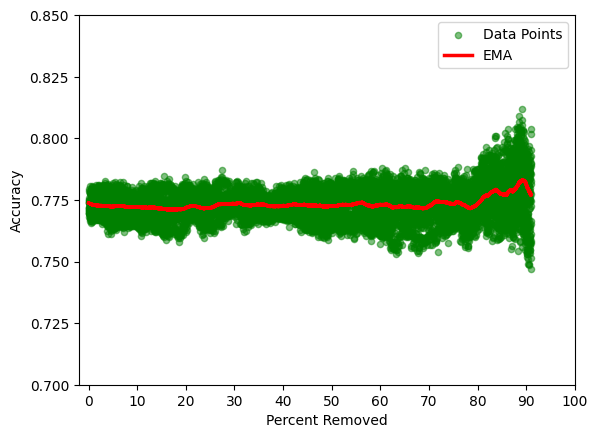

In [ ]:
span = 300
ds_model_rg_srt['EMA'] = ds_model_rg_srt['Accuracy'].ewm(span=span, adjust=False).mean()
fig, ax = plt.subplots()
ax.scatter(ds_model_rg_srt['PercentRemoved'], ds_model_rg_srt['Accuracy'], alpha=0.5, color='green', s=20, label='Data Points')
ax.plot(ds_model_rg_srt['PercentRemoved'], ds_model_rg_srt['EMA'], color='red', linewidth=2.5, label='EMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

# Decision Tree

In [ ]:
ds_model_dt = read_output_files(out_path)
ds_model_dt_srt = ds_model_dt.sort_values(by='PercentRemoved')
ds_model_dt_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.756029,0.00
1,2,0.759925,0.07
2,2,0.754179,0.07
3,2,0.759193,0.07
4,2,0.751358,0.07
...,...,...,...
12995,2,0.783063,91.00
12996,2,0.737819,91.00
12997,2,0.769142,91.00
12998,2,0.763341,91.00


In [ ]:
hg_acc_cb = ds_model_dt_srt['Accuracy'].max()
lw_acc_cb = ds_model_dt_srt['Accuracy'].min()
base_acc_cb = ds_model_dt_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_dt = pd.DataFrame(cbkeyval)
dataf_dt

Difference between highest and lowest accuracy: 0.06843537414965983
Difference between highest and base accuracy: 0.033494996495309626
Difference between lowest and base accuracy: -0.03494037765435021


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.789524,0.721088,0.756029,0.068435,0.033495,-0.03494


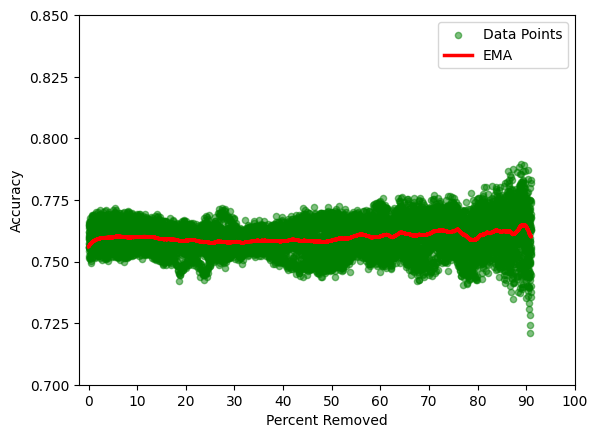

In [ ]:
span = 300
ds_model_dt_srt['EMA'] = ds_model_dt_srt['Accuracy'].ewm(span=span, adjust=False).mean()
fig, ax = plt.subplots()
ax.scatter(ds_model_dt_srt['PercentRemoved'], ds_model_dt_srt['Accuracy'], alpha=0.5, color='green', s=20, label='Data Points')
ax.plot(ds_model_dt_srt['PercentRemoved'], ds_model_dt_srt['EMA'], color='red', linewidth=2.5, label='EMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

# Bagging

In [ ]:
ds_model_bg = read_output_files(out_path)
ds_model_bg_srt = ds_model_bg.sort_values(by='PercentRemoved')
ds_model_bg_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.740892,0.00
1,2,0.742791,0.07
2,2,0.737777,0.07
3,2,0.737568,0.07
4,2,0.739031,0.07
...,...,...,...
12995,2,0.737819,91.00
12996,2,0.741299,91.00
12997,2,0.751740,91.00
12998,2,0.751740,91.00


In [ ]:
hg_acc_cb = ds_model_bg_srt['Accuracy'].max()
lw_acc_cb = ds_model_bg_srt['Accuracy'].min()
base_acc_cb = ds_model_bg_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_bg = pd.DataFrame(cbkeyval)
dataf_bg

Difference between highest and lowest accuracy: 0.06083201406831018
Difference between highest and base accuracy: 0.03533224266077384
Difference between lowest and base accuracy: -0.025499771407536342


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.776224,0.715392,0.740892,0.060832,0.035332,-0.0255


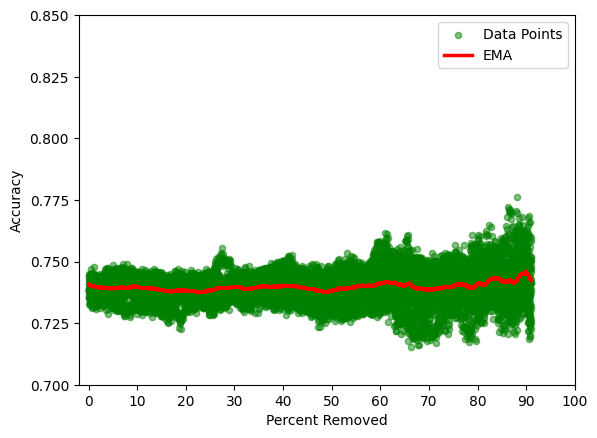

In [ ]:
span = 300
ds_model_bg_srt['EMA'] = ds_model_bg_srt['Accuracy'].ewm(span=span, adjust=False).mean()
fig, ax = plt.subplots()
ax.scatter(ds_model_bg_srt['PercentRemoved'], ds_model_bg_srt['Accuracy'], alpha=0.5, color='green', s=20, label='Data Points')
ax.plot(ds_model_bg_srt['PercentRemoved'], ds_model_bg_srt['EMA'], color='red', linewidth=2.5, label='EMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

# Random Forest

In [ ]:
ds_model_rf = read_output_files(out_path)
ds_model_rf_srt = ds_model_rf.sort_values(by='PercentRemoved')
ds_model_rf_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.763128,0.00
1,2,0.765566,0.07
2,2,0.762954,0.07
3,2,0.760029,0.07
4,2,0.765566,0.07
...,...,...,...
12995,2,0.788863,91.00
12996,2,0.743619,91.00
12997,2,0.770302,91.00
12998,2,0.779582,91.00


In [ ]:
hg_acc_cb = ds_model_rf_srt['Accuracy'].max()
lw_acc_cb = ds_model_rf_srt['Accuracy'].min()
base_acc_cb = ds_model_rf_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_rg = pd.DataFrame(cbkeyval)
dataf_rg

Difference between highest and lowest accuracy: 0.059503542265405995
Difference between highest and base accuracy: 0.037236955688639495
Difference between lowest and base accuracy: -0.0222665865767665


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.800365,0.740861,0.763128,0.059504,0.037237,-0.022267


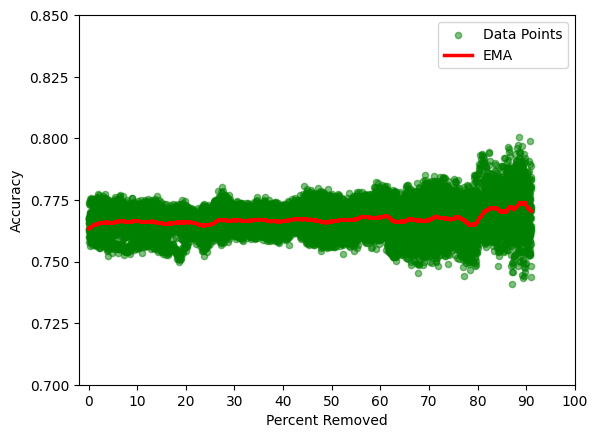

In [ ]:
span = 300
ds_model_rf_srt['EMA'] = ds_model_rf_srt['Accuracy'].ewm(span=span, adjust=False).mean()
fig, ax = plt.subplots()
ax.scatter(ds_model_rf_srt['PercentRemoved'], ds_model_rf_srt['Accuracy'], alpha=0.5, color='green', s=20, label='Data Points')
ax.plot(ds_model_rf_srt['PercentRemoved'], ds_model_rf_srt['EMA'], color='red', linewidth=2.5, label='EMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

# CatBoost

In [ ]:
ds_model_cb = read_output_files(out_path)
ds_model_cb_srt = ds_model_cb.sort_values(by='PercentRemoved')
ds_model_cb_srt

,DataSize,Accuracy,PercentRemoved
0,2,0.772732,0.00
1,2,0.808608,0.07
2,2,0.809967,0.07
3,2,0.803907,0.07
4,2,0.802758,0.07
...,...,...,...
12995,2,0.819026,91.00
12996,2,0.779582,91.00
12997,2,0.819026,91.00
12998,2,0.808585,91.00


In [ ]:
hg_acc_cb = ds_model_cb_srt['Accuracy'].max()
lw_acc_cb = ds_model_cb_srt['Accuracy'].min()
base_acc_cb = ds_model_cb_srt['Accuracy'].iloc[0]


acc_hl_cb = hg_acc_cb - lw_acc_cb
acc_hb_cb = hg_acc_cb - base_acc_cb
acc_lb_cb = lw_acc_cb - base_acc_cb

print("Difference between highest and lowest accuracy:", acc_hl_cb)
print("Difference between highest and base accuracy:", acc_hb_cb)
print("Difference between lowest and base accuracy:", acc_lb_cb)

cbkeyval = {
    'high_acc': [hg_acc_cb],
    'low_acc': [lw_acc_cb],
    'base_acc': [base_acc_cb],
    'diff_high_low': [acc_hl_cb],
    'diff_high_base': [acc_hb_cb],
    'diff_low_base': [acc_lb_cb]
}

dataf_cb = pd.DataFrame(cbkeyval)
dataf_cb

Difference between highest and lowest accuracy: 0.06715292931155237
Difference between highest and base accuracy: 0.06715292931155237
Difference between lowest and base accuracy: 0.0


,high_acc,low_acc,base_acc,diff_high_low,diff_high_base,diff_low_base
0,0.839885,0.772732,0.772732,0.067153,0.067153,0.0


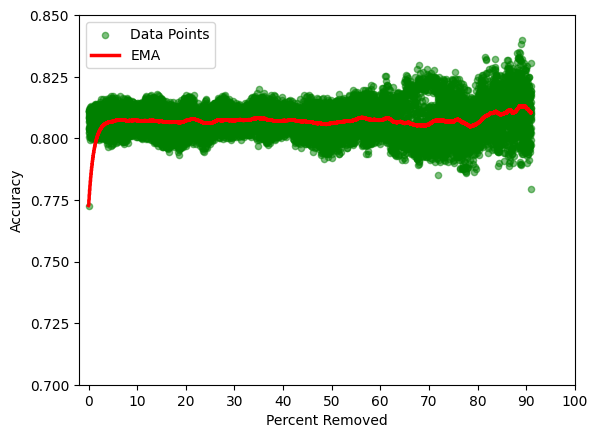

In [ ]:
span = 300
ds_model_cb_srt['EMA'] = ds_model_cb_srt['Accuracy'].ewm(span=span, adjust=False).mean()
fig, ax = plt.subplots()
ax.scatter(ds_model_cb_srt['PercentRemoved'], ds_model_cb_srt['Accuracy'], alpha=0.5, color='green', s=20, label='Data Points')
ax.plot(ds_model_cb_srt['PercentRemoved'], ds_model_cb_srt['EMA'], color='red', linewidth=2.5, label='EMA')
ax.set_xlim(-2, 100)
ax.set_xticks(range(0, 101, 10))
plt.yticks(np.arange(0.7, 0.85, 0.025))
ax.set_xlabel('Percent Removed')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()